In [1]:
# Warnings
import warnings
warnings.filterwarnings("ignore")
# Packages
import os
import mne
from pathlib import Path
# Functions
from dataloader import load_raw, load_config
from preprocess import clean

## Dataloader

In [2]:
path='/home/ubuntu/Github/codex/datasets/eeg/sub01/raw_data/Rest_Outside_960420.vhdr'
# path='/home/ubuntu/Github/codex/datasets/eeg/sub01/preprocessed/outside_preprocessed.set'
# path='/home/ubuntu/Github/codex/datasets/eeg/sub02/eeg.edf'

Extracting parameters from /home/ubuntu/Github/codex/datasets/eeg/sub01/raw_data/Rest_Outside_960420.vhdr...
Setting channel info structure...
<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: 2017-07-11 12:17:29 UTC
 nchan: 64
 projs: []
 sfreq: 5000.0 Hz
>
Using matplotlib as 2D backend.


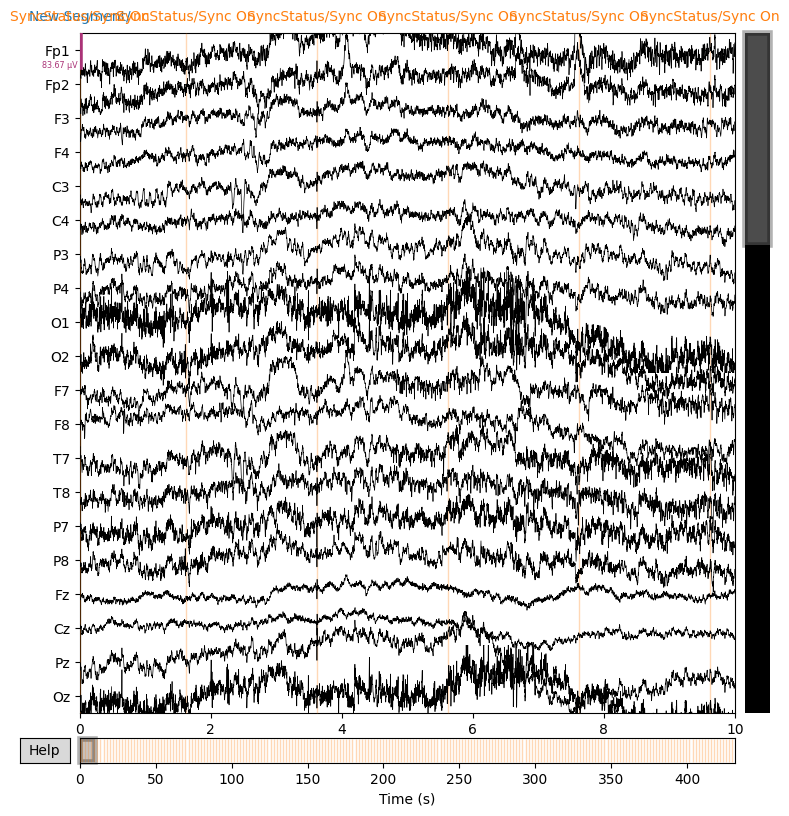

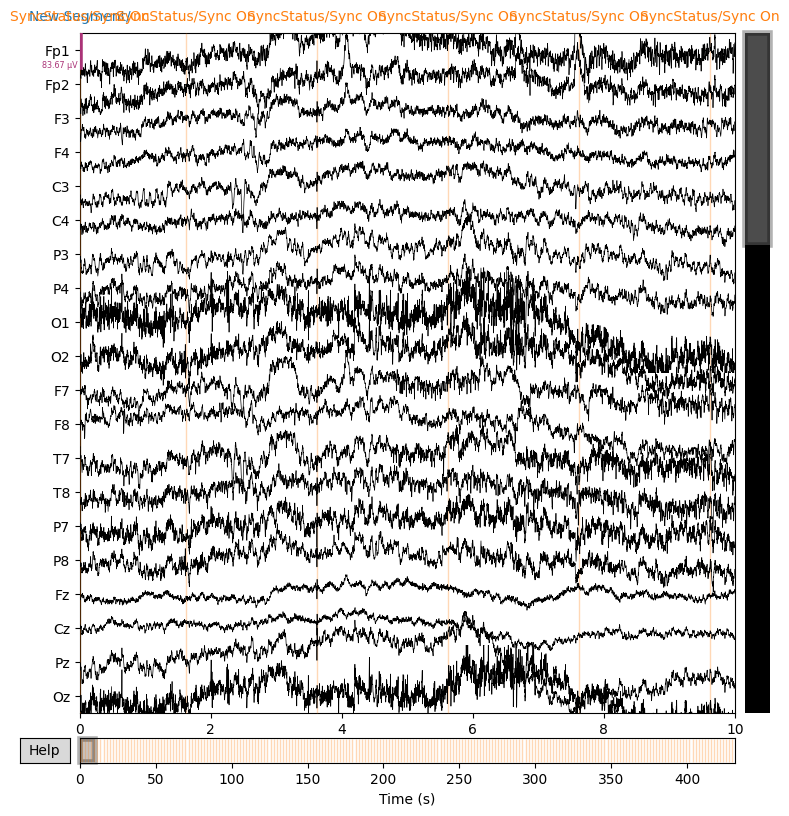

In [3]:
eeg = load_raw(path=path)
eeg_data = eeg.get_data()
n_channels, n_samples = eeg_data.shape
print(eeg.info)
eeg.plot(scalings='auto', title="Raw EEG")

## Preprocess

In [ ]:
sfreq=256
low=1.0
high=70.0
normalize=False
apply_ica=True
n_components=None
reject_components='auto'
zscore_thresh=10

eeg_cleaned_data, ica_info = clean(eeg_data, sfreq=sfreq, low=low, high=high, normalize=normalize, apply_ica=apply_ica, n_components=n_components, reject_components=reject_components, zscore_thresh=zscore_thresh)
if ica_info: print("Removed ICs:", ica_info['rejected_components'])

Removed ICs: [np.int64(0), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(40), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(59), np.int64(60), np.int64(61), np.int64(62), np.int64(63)]


Creating RawArray with float64 data, n_channels=64, n_times=2157400
    Range : 0 ... 2157399 =      0.000 ...  8427.340 secs
Ready.


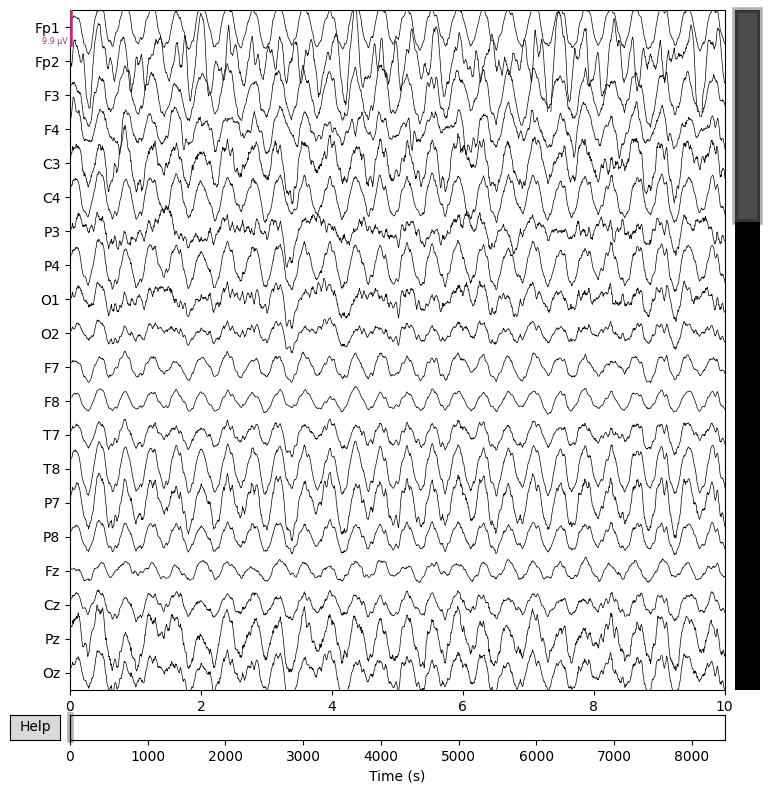

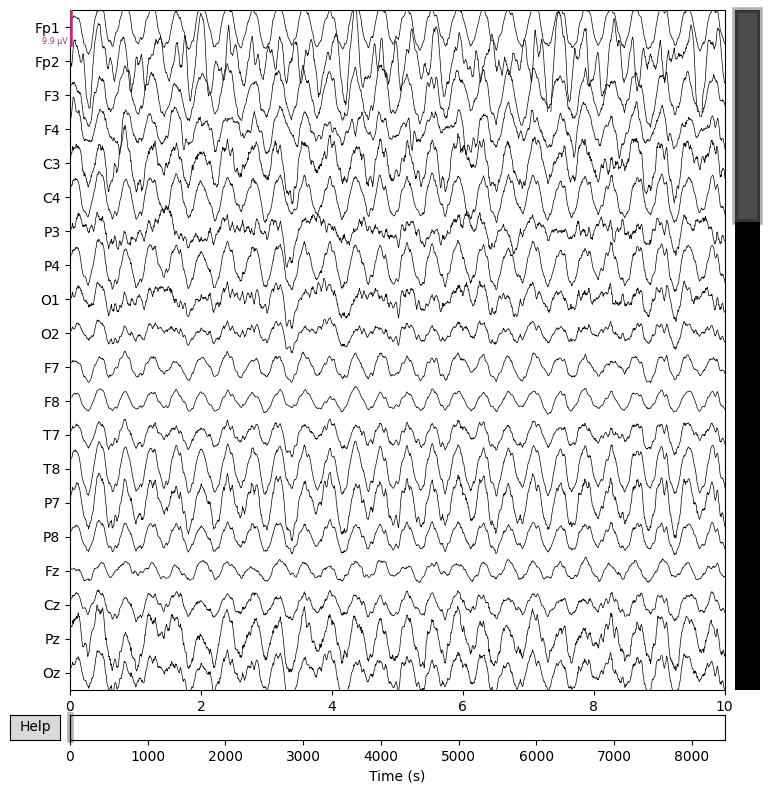

In [10]:
eeg_cleaned_info = mne.create_info(
    ch_names=eeg.info['ch_names'],
    ch_types=['eeg'] * len(eeg.info['ch_names']),  
    sfreq=sfreq
)

# eeg_cleaned_info['bads'] = ica_info['bads'] if ica_info and 'bads' in ica_info else []
# eeg_cleaned_info['description'] = 'Cleaned EEG data'
# eeg_cleaned_info['highpass'] = low
# eeg_cleaned_info['lowpass'] = high
# eeg_cleaned_info['sfreq'] = sfreq
# eeg_cleaned_info['ch_names'] = eeg.info['ch_names']
# eeg_cleaned_info['nchan'] = n_channels
# eeg_cleaned_info['n_samples'] = n_samples
# eeg_cleaned_info['meas_date'] = eeg.info['meas_date']
# eeg_cleaned_info['projs'] = eeg.info['projs']
# eeg_cleaned_info['events'] = eeg.info['events'] if 'events' in eeg.info else []
# eeg_cleaned_info['dig'] = eeg.info['dig'] if 'dig' in eeg.info else []
# eeg_cleaned_info['dev_head_t'] = eeg.info['dev_head_t'] if 'dev_head_t' in eeg.info else None

eeg_cleaned = mne.io.RawArray(eeg_cleaned_data, eeg_cleaned_info)
eeg_cleaned.plot(scalings='auto', title="Cleaned EEG")